이 동영상 참고!!
https://www.youtube.com/watch?v=tIeHLnjs5U8

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 입력 이미지 채널 1개, 출력 채널 6개, 5x5의 정사각 컨볼루션 행렬
        # 컨볼루션 커널 정의
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 아핀(affine) 연산: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5은 이미지 차원에 해당
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # (2, 2) 크기 윈도우에 대해 맥스 풀링(max pooling)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 제곱수라면, 하나의 숫자만을 특정(specify)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # 배치 차원을 제외한 모든 차원을 하나로 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [2]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1의 .weight

10
torch.Size([6, 1, 5, 5])


In [3]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0161, -0.0690, -0.0306,  0.0372, -0.0967, -0.0313,  0.0563,  0.0546,
          0.0364, -0.0745]], grad_fn=<AddmmBackward0>)


In [4]:
net.zero_grad()
out.backward(torch.randn(1, 10))

# simple code of backward propagation

In [8]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

prediction = model(data) # 순전파 단계(forward pass)

loss = (prediction - labels).sum()
loss.backward() # 역전파 단계(backward pass)

optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

optim.step() # 경사하강법(gradient descent)

# auto grad differentiation

In [19]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

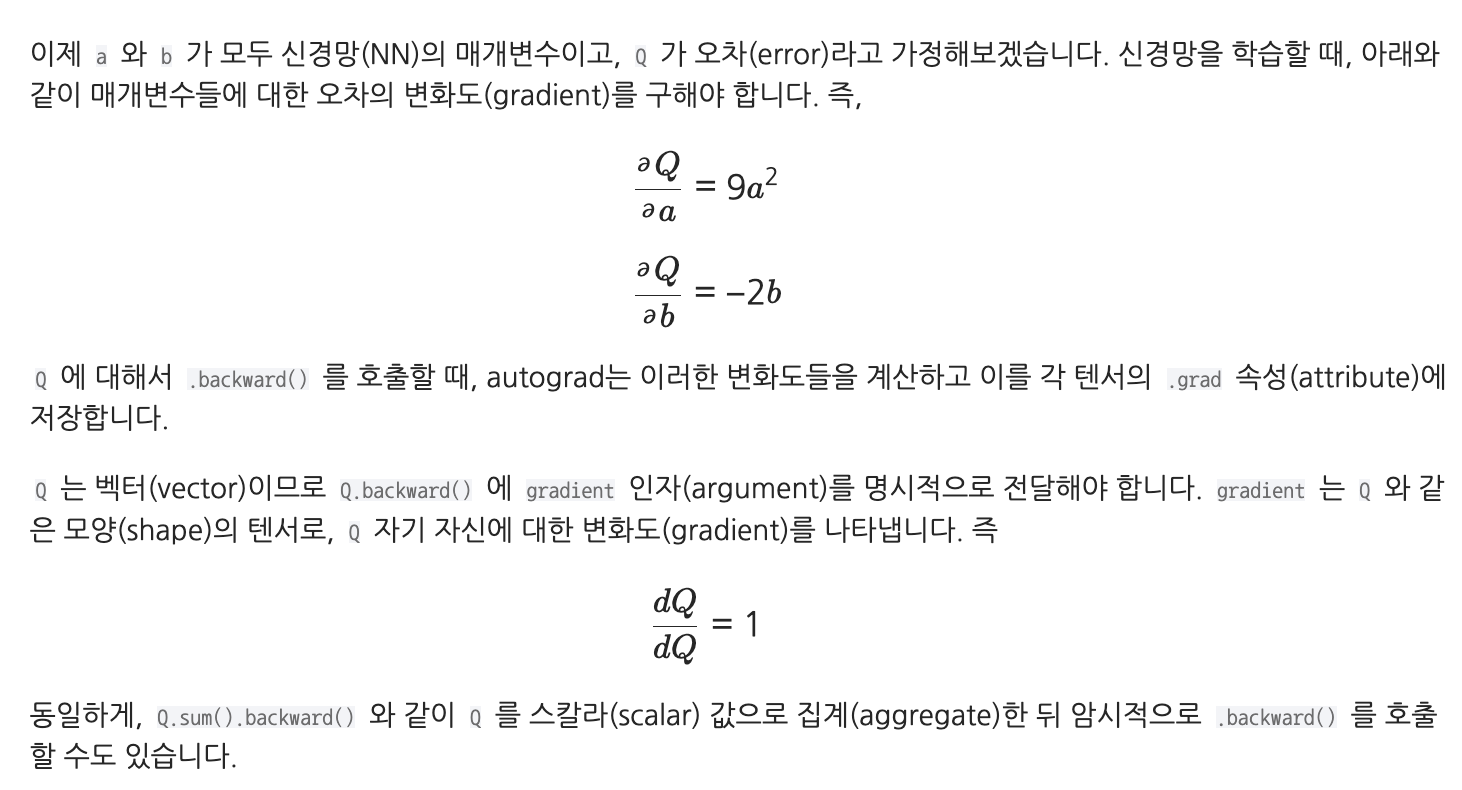

In [20]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# 수집된 변화도가 올바른지 확인합니다.
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [26]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

c = b - z
print(f"Does `b` require gradients?: {c.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True
Does `b` require gradients?: True


# freeze

In [27]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# 신경망의 모든 매개변수를 고정합니다
for param in model.parameters():
    param.requires_grad = False

In [33]:
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 10)


##############################
# 유일한 변수이다.
model.fc = nn.Linear(512, 10)
##############################

# 분류기만 최적화합니다.
prediction = model(data) # 순전파 단계(forward pass)

loss = (prediction - labels).sum()
loss.backward() # 역전파 단계(backward pass)

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optimizer.step() # 경사하강법(gradient descent)